# Endpoint /historicos
#### Este endpoint permite obtener precios históricos al cierre de la emisora y serie solicitada.
###### Consuta la documentación completa para este endpoint en: https://databursatil.com/docs.html#historicos

En este ejemplo, utilizaremos los parámetros <code>'emisora_serie': 'CEMEXCPO'</code>, <code>'inicio': '2022-11-01'</code> y <code>'final': '2022-12-31'</code>

In [1]:
import requests
import json
import pandas as pd
import numpy as np

url = "https://api.databursatil.com/v1/historicos"

parametros = {"token": "TU_TOKEN",
              "emisora_serie": "ALSEA*",
              "inicio": "2022-01-01",
              "final": "2022-12-31"}

#Realizamos la solicitud web.
top = requests.get(url, params=parametros)
#Convertimos el contenido web para que Python sepa que es un JSON.
top = json.loads(top.content)
#Creamos el DataFrame.
df = pd.DataFrame.from_dict(top)
#Python por default convirtió el precio e importe el notacion cientifica, hacemos que los reconozca como numeros decimales.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#Invertimos el orden de la tabla, ya que por default Python la crea de forma horizontal y no vertical.
df = df.T
#Le damos un nombre al índice.
df.index.names = ["Fecha"]
#Hacemos que Python reconozca que la fecha es realmente una fecha y no texto
df.index = pd.to_datetime(df.index, format='%Y/%m/%d')
#Le damos un nombre a las dos columnas.
df.rename(columns = {0:'Precio', 1:'Importe'}, inplace = True)
#Calculamos el rendimiento logaritmico de cada precio con base al anterior.
df["Rendimiento"] = np.log(df["Precio"]/df["Precio"].shift())
#Removemos valores los NA, que generalmente suele ser el primer precio, ya que no hay un dato previo.
df.dropna(inplace=True)
df.reset_index(level=0, inplace=True)
#Visualizamos la tabla
df

,Fecha,Precio,Importe,Rendimiento
0,2022-01-04,41.03,146794560.31,0.03
1,2022-01-05,41.90,303728848.38,0.02
2,2022-01-06,41.78,51596647.80,-0.00
3,2022-01-07,43.23,125537791.71,0.03
4,2022-01-10,43.58,110513547.07,0.01
...,...,...,...,...
217,2022-11-11,39.08,57526516.17,0.02
218,2022-11-14,38.37,88782396.47,-0.02
219,2022-11-15,38.41,34710455.39,0.00
220,2022-11-16,38.44,30115782.28,0.00


#### Ahora graficamos precio e importe

<AxesSubplot:title={'center':'ALSEA*'}, xlabel='Fecha'>

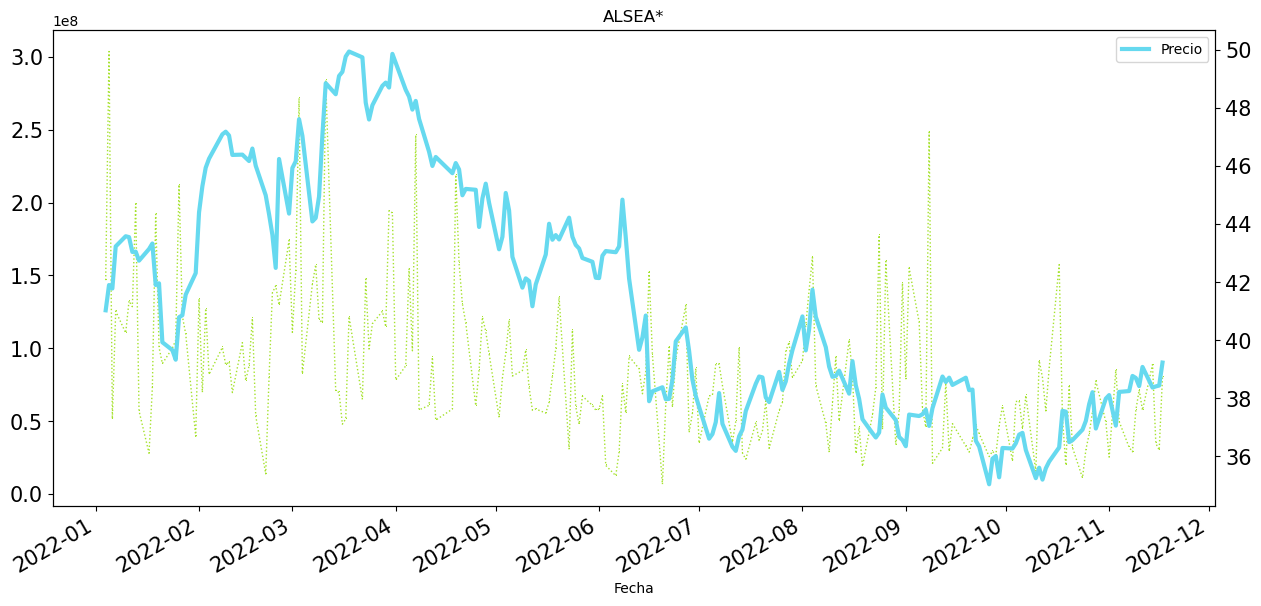

In [2]:
ax = df.plot('Fecha','Importe', color='#a6e22e', fontsize=(15), legend=False, linewidth=1.0, linestyle=':', marker=',')
ax1 = ax.twinx()
df.plot('Fecha','Precio',ax=ax1,  color='#66d9ef', fontsize=(15), legend=True, linewidth=3.0, figsize=(15,7), title=parametros["emisora_serie"])

#### Mismo proceso, pero ahora para Precio y Rendimiento

<AxesSubplot:title={'center':'ALSEA*'}, xlabel='Fecha'>

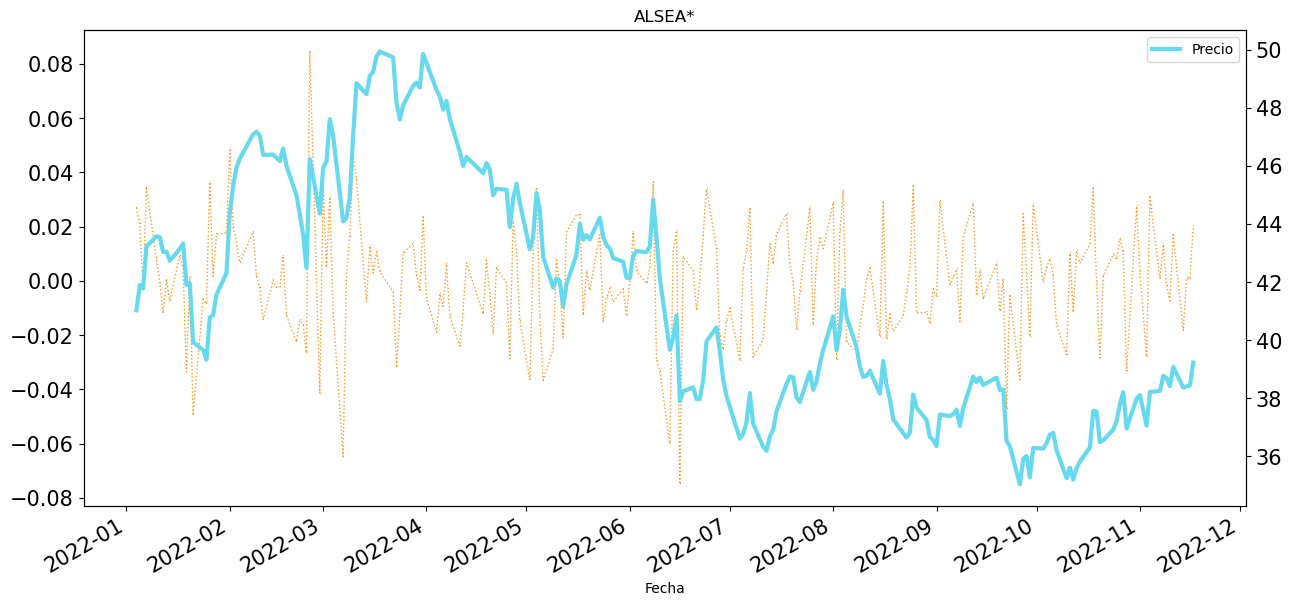

In [3]:
ax = df.plot('Fecha','Rendimiento', color='#fd971f', fontsize=(15), legend=False, linewidth=1.0, linestyle=':', marker=',')
ax1 = ax.twinx()
df.plot('Fecha','Precio',ax=ax1,  color='#66d9ef', fontsize=(15), legend=True, linewidth=3.0, figsize=(15,7), title=parametros["emisora_serie"])